## **Calculating technical indicators - introduction**

**1. Use data extracted using an API, calculate simple annual return**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


https://numpy.org/

https://pandas.pydata.org/

https://matplotlib.org/

https://pypi.org/project/yfinance/

https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html

# Calculate beta of a stock

https://www.investopedia.com/terms/b/beta.asp#:~:text=Error%20Code%3A%20100013)-,What%20Is%20Beta%3F,volatile%20than%20the%20S%26P%20500.

Denote the volatility or systematic risk of a security or portfolio compared to the market, usually the S&P 500 which has a beta of 1.0. Stocks with betas higher than 1.0 are interpreted as more volatile than the S&P 500.

**Calculating Beta**

A security's beta is calculated by dividing the product of the covariance of the security's returns and the market's returns by the variance of the market's returns over a specified period. The calculation helps investors understand whether a stock moves in the same direction as the rest of the market. It also provides insights into how volatile–or how risky–a stock is relative to the rest of the market.

**Beta Values**

*Beta Equal to 1*: A stock with a beta of 1.0 means its price activity correlates with the market. Adding a stock to a portfolio with a beta of 1.0 doesn’t add any risk to the portfolio, but doesn’t increase the likelihood that the portfolio will provide an excess return.

*Beta Less than 1*: A beta value less than 1.0 means the security is less volatile than the market. Including this stock in a portfolio makes it less risky than the same portfolio without the stock. Utility stocks often have low betas because they move more slowly than market averages.

*Beta Greater than 1*: A beta greater than 1.0 indicates that the security's price is theoretically more volatile than the market. If a stock's beta is 1.2, it is assumed to be 20% more volatile than the market. Technology stocks tend to have higher betas than the market benchmark. Adding the stock to a portfolio will increase the portfolio’s risk, but may also increase its return.

*Negative Beta*: A beta of -1.0 means that the stock is inversely correlated to the market benchmark on a 1:1 basis. Put options and inverse ETFs are designed to have negative betas. There are also a few industry groups, like gold miners, where a negative beta is common.

**Covariance of returns**
<br>To what extent do variables change together. Covariance calculated from a sample is given below. <br>
We can get the direction of the relationship but not the strength as it is dependent on the scale of the variables. <br>

*Covariance can be calculated using the cov() method in pandas.*

In [104]:
# 1. Calculate beta for a stock
# ticker symbol for S&P 500 market index :  ^GSPC

tickers = ['GOOG', '^GSPC']

# 1.1.2 dataframe to store the price data of the securities inthe portfolio
df = pd.DataFrame()

# 1.1.3 for each security in the portfolio, download price monthly data using the yahoo finance API and store in the df pandas dataframe
for t in tickers:
    #df[t] = yf.download(t, start='2019-1-1')['Adj Close']
    df[t] = yf.download(t, start='2019-10-1',interval='1mo' )['Adj Close']

# 1.1.4 print metadata on dataframe df
df.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2019-10-01 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    62 non-null     float64
 1   ^GSPC   62 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [105]:
df.head()

,GOOG,^GSPC
Date,,
2019-10-01 00:00:00+00:00,62.851147,3037.560059
2019-11-01 00:00:00+00:00,65.088158,3140.979980
2019-12-01 00:00:00+00:00,66.687225,3230.780029
2020-01-01 00:00:00+00:00,71.535820,3225.520020
2020-02-01 00:00:00+00:00,66.802444,2954.219971


In [106]:
df.tail()

,GOOG,^GSPC
Date,,
2024-07-01 00:00:00+00:00,172.922363,5522.299805
2024-08-01 00:00:00+00:00,164.892944,5648.399902
2024-09-01 00:00:00+00:00,166.970215,5762.479980
2024-10-01 00:00:00+00:00,172.690002,5705.450195
2024-11-01 00:00:00+00:00,179.860001,5995.540039


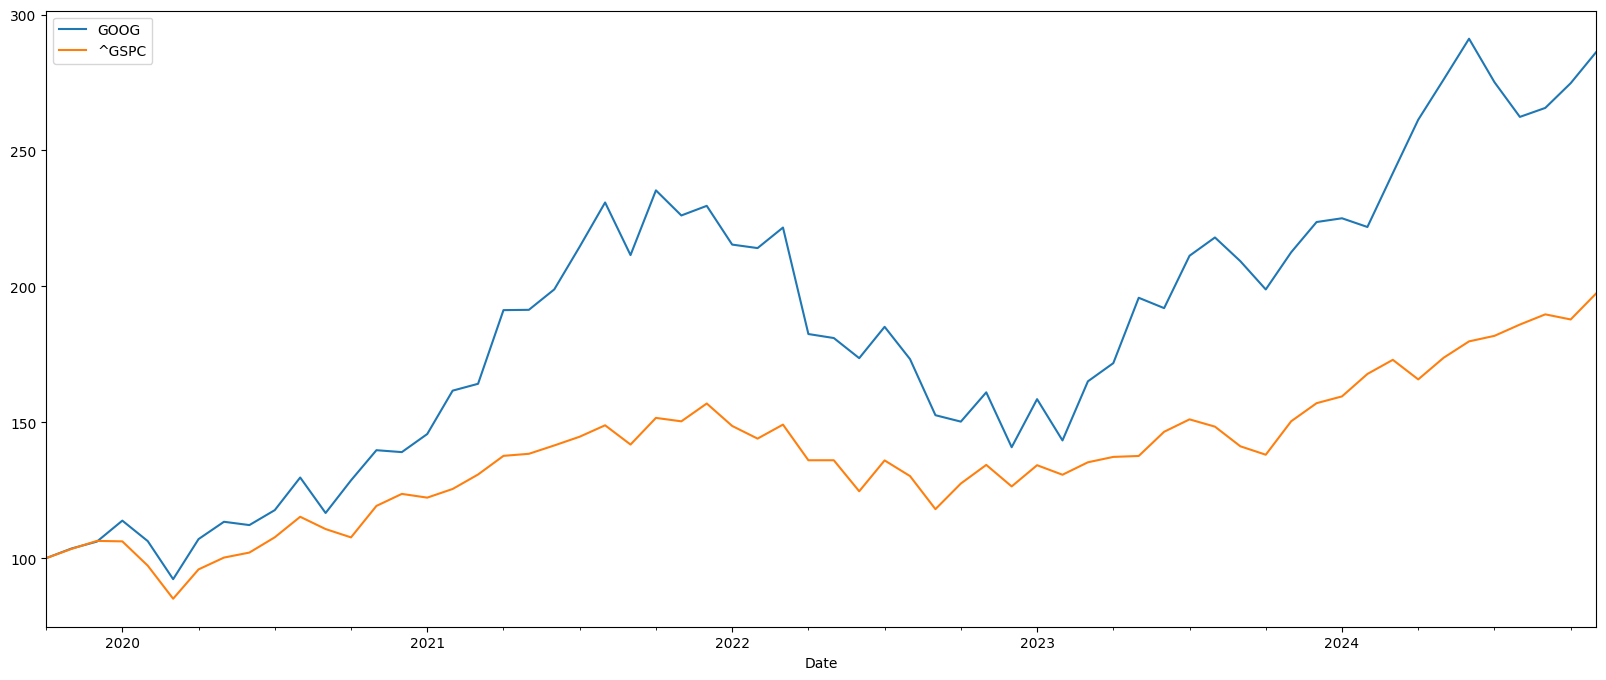

In [107]:
# 2.1 Normalize to 100 and plot prices over time: Normalizing enables to compare the price of different stocks starting from the same value.
# plot the normalized data
(df / df.iloc[0] * 100).plot(figsize = (20, 8));
plt.show()

In [108]:
# 3.1 Calculate the daily simple rate of returns of the securities in the portfolio using the adjusted close price
returns = (df / df.shift(1)) - 1
returns.head()

,GOOG,^GSPC
Date,,
2019-10-01 00:00:00+00:00,NaN,NaN
2019-11-01 00:00:00+00:00,0.035592,0.034047
2019-12-01 00:00:00+00:00,0.024568,0.028590
2020-01-01 00:00:00+00:00,0.072706,-0.001628
2020-02-01 00:00:00+00:00,-0.066168,-0.084110


In [109]:
# 4.1.1 Annual variance of each security
Var= returns.var() * 12
print(Var)

GOOG     0.070835
^GSPC    0.032294
dtype: float64


In [110]:
#4.1.2 Calculate covariance matrix of daily returns of stocks in the portfolio
cov_matrix_a = returns.cov() * 12
print(cov_matrix_a)

           GOOG     ^GSPC
GOOG   0.070835  0.033407
^GSPC  0.033407  0.032294


In [111]:
# 5. Calculate beta : covariance(security, market) / variance(market)
beta = cov_matrix_a.iloc[0,1]/cov_matrix_a.iloc[1,1]
print(beta)

1.0344566178316748
